In [153]:
import pandas as pd
from matplotlib.pyplot import plot, title, show, legend
from scipy import polyval
from sklearn.model_selection import train_test_split\

temp = {
    'Amersfoort' : 0,
    'Utrecht' : 1,
    'Tilburg' : 2,
    'Amsterdam' : 3,
    'Breda' : 4,
    'DenHaag' : 5,
    'Amersfoort(Vathorst)' : 6,
    'Houten' : 7
}
inv_map = {v: k for k, v in temp.items()}

df = pd.read_csv('teams.csv')
df = df.drop(columns=['competitie_naam', 'genre', 'poule_naam', 'divisie', 'sporthal', 'plaats_uitclub',
                     'plaats_thuisclub', 'seizoen'])
print(df.columns)

df2 = pd.read_csv('output.csv')
print(df2.columns)
df2.locatie = df2['locatie'].apply(lambda x: temp[x.replace(' ', '')])
print(df2.locatie.unique())

Index(['datum', 'tijd', 'plaats_sporthal', 'thuisteam', 'thuisclub', 'uitteam',
       'uitclub', 'scheids1_hashed', 'scheids2_hashed', 'thuisscore',
       'uitscore'],
      dtype='object')
Index(['index', 'datum', 'locatie', 'scheids1', 'scheids2', 'score', 'team',
       'uit_thuis'],
      dtype='object')
[0 1 2 6 3 4 5 7]


In [166]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = df2[['score', 'locatie']]
X = pd.DataFrame(dataset['locatie'])
y = pd.DataFrame(dataset['score'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [168]:
pred = regressor.predict(0)
print(pred)

[3.33333333]


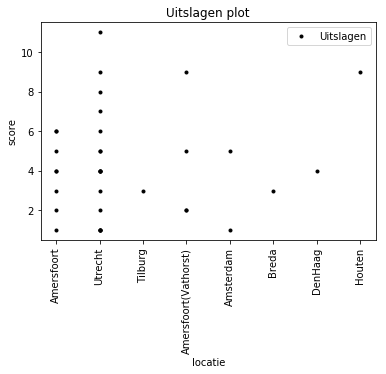

In [157]:
from matplotlib.pyplot import plot, title, show, legend, xlabel, ylabel, xticks

x = df2.locatie.apply(lambda x: inv_map[x])
xn = df2.score
title('Uitslagen plot')
plot(x, xn, 'k.')
# plot(pred, 'r.')
legend(['Uitslagen'])
xlabel('locatie')
xticks(rotation=90)
ylabel('score')
show()

In [160]:
len(pred)

11

In [180]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df.plaats_sporthal)
coded = le.transform(['Amersfoort', 'Amsterdam'])
print(coded)
le.inverse_transform([0, 2])

[0 2]


/Users/leonard/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Amersfoort', 'Amsterdam'], dtype=object)